# Normalization


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

Data = pd.read_excel(r'/content/gdrive/My Drive/excel/original data.xlsx',sheet_name='Program Pengolahan')

In [ ]:
display(pd.DataFrame(Data))

,Glucose,BloodPressure,BMI,Age,Outcome
0,148,72,33.6,50,1
1,85,66,26.6,31,0
2,183,64,23.3,32,1
3,89,66,28.1,21,0
4,137,40,43.1,33,1
...,...,...,...,...,...
1995,167,0,32.3,30,1
1996,144,58,31.6,25,1
1997,77,82,35.8,35,0
1998,115,98,52.9,28,1


In [ ]:
# Pilih kolom yang ingin dinormalisasi
columns_to_normalize = ['Glucose', 'BloodPressure', 'BMI', 'Age']
# Min-Max Scaling
for column in columns_to_normalize:
    min_val = Data[column].min()
    max_val = Data[column].max()
    Data[column] = (Data[column] - min_val) / (max_val - min_val)

# Tampilkan data yang sudah dinormalisasi
print("\nData yang Sudah Dinormalisasi:")
print(Data)


Data yang Sudah Dinormalisasi:
       Glucose  BloodPressure       BMI       Age  Outcome
0     0.743719       0.590164  0.500745  0.483333        1
1     0.427136       0.540984  0.396423  0.166667        0
2     0.919598       0.524590  0.347243  0.183333        1
3     0.447236       0.540984  0.418778  0.000000        0
4     0.688442       0.327869  0.642325  0.200000        1
...        ...            ...       ...       ...      ...
1995  0.839196       0.000000  0.481371  0.150000        1
1996  0.723618       0.475410  0.470939  0.066667        1
1997  0.386935       0.672131  0.533532  0.233333        0
1998  0.577889       0.803279  0.788376  0.116667        1
1999  0.753769       0.622951  0.312966  0.266667        0

[2000 rows x 5 columns]


#Glucose

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

Data = pd.read_excel(r'/content/gdrive/My Drive/excel/original data.xlsx',sheet_name='Program Pengolahan')

In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Membaca data dari file Excel
Data = pd.read_excel(r'/content/gdrive/My Drive/excel/original data.xlsx',sheet_name='Program Pengolahan')

# Pilih kolom yang ingin Anda normalisasikan
nama_kolom = 'Glucose'

# Normalisasi data
nilai_maksimum = Data[nama_kolom].max()
nilai_minimum = Data[nama_kolom].min()
Data['Glucose_Normalized'] = (Data[nama_kolom] - nilai_minimum) / (nilai_maksimum - nilai_minimum)

# Tentukan jumlah bin (Anda dapat menyesuaikan ini berdasarkan preferensi Anda)
jumlah_bin = 5

# Hitung lebar bin
lebar_bin = 1 / jumlah_bin

# Buat bin
bin_edges = [i * lebar_bin for i in range(jumlah_bin + 1)]

# Buat label untuk bin berdasarkan rentang nilai normalisasi "Glucose"
bin_labels = [f'{round(bin_edges[i], 2)} - {round(bin_edges[i+1], 2)}' for i in range(jumlah_bin)]

# Berikan setiap nilai normalisasi ke dalam bin menggunakan pd.cut
Data['bin'] = pd.cut(Data['Glucose_Normalized'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Hitung distribusi frekuensi
frekuensi_tabel = Data['bin'].value_counts().sort_index().reset_index()
frekuensi_tabel.columns = ['Rentang Glucose_Normalized', 'Frekuensi']

# Hitung Frekuensi Kumulatif Kurang Dari dan Lebih Dari
frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] = frekuensi_tabel['Frekuensi'].cumsum()
frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'] = frekuensi_tabel['Frekuensi'][::-1].cumsum()[::-1]

# Hitung Frekuensi Relatif dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif'] = (frekuensi_tabel['Frekuensi'] / len(Data)) * 100

# Hitung Frekuensi Relatif Kumulatif Kurang Dari dan Lebih Dari dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif Kumulatif Kurang Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] / len(Data)) * 100
frekuensi_tabel['Frekuensi Relatif Kumulatif Lebih Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'][::-1] / len(Data)) * 100

# Tampilkan tabel distribusi frekuensi dari data normalisasi
print("\nTabel Distribusi Frekuensi (dalam persen):")
print(tabulate(frekuensi_tabel, headers='keys', tablefmt='pretty'))


Tabel Distribusi Frekuensi (dalam persen):
+---+----------------------------+-----------+---------------------------------+--------------------------------+--------------------+-----------------------------------------+----------------------------------------+
|   | Rentang Glucose_Normalized | Frekuensi | Frekuensi Kumulatif Kurang Dari | Frekuensi Kumulatif Lebih Dari | Frekuensi Relatif  | Frekuensi Relatif Kumulatif Kurang Dari | Frekuensi Relatif Kumulatif Lebih Dari |
+---+----------------------------+-----------+---------------------------------+--------------------------------+--------------------+-----------------------------------------+----------------------------------------+
| 0 |         0.0 - 0.2          |    14     |               14                |              2000              | 0.7000000000000001 |           0.7000000000000001            |                 100.0                  |
| 1 |         0.2 - 0.4          |    89     |               103               |    


Tabel Distribusi Frekuensi (dalam persen):
+---+----------------------------+-----------+---------------------------------+--------------------------------+--------------------+-----------------------------------------+----------------------------------------+
|   | Rentang Glucose_Normalized | Frekuensi | Frekuensi Kumulatif Kurang Dari | Frekuensi Kumulatif Lebih Dari | Frekuensi Relatif  | Frekuensi Relatif Kumulatif Kurang Dari | Frekuensi Relatif Kumulatif Lebih Dari |
+---+----------------------------+-----------+---------------------------------+--------------------------------+--------------------+-----------------------------------------+----------------------------------------+
| 0 |         0.0 - 0.2          |    14     |               14                |              2000              | 0.7000000000000001 |           0.7000000000000001            |                 100.0                  |
| 1 |         0.2 - 0.4          |    89     |               103               |    

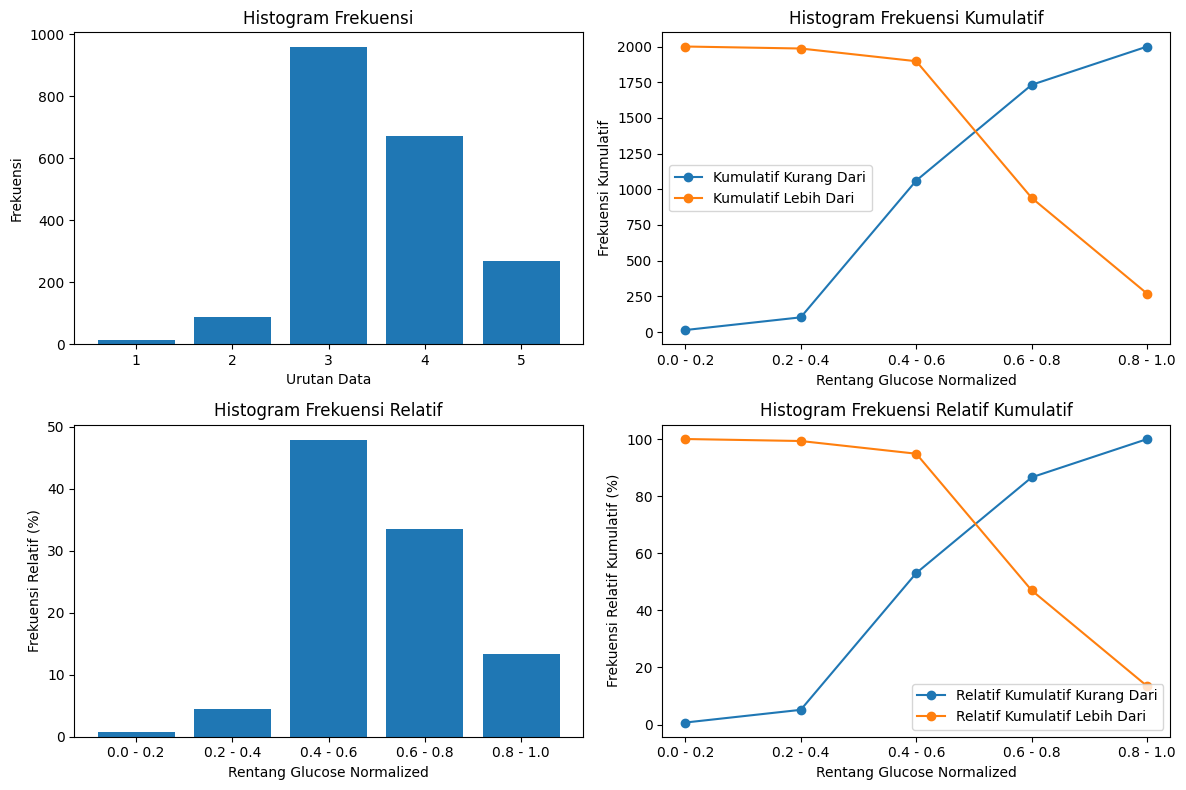

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Membaca data dari file Excel
Data = pd.read_excel(r'/content/gdrive/My Drive/excel/original data.xlsx',sheet_name='Program Pengolahan')

# Pilih kolom yang ingin Anda normalisasikan
nama_kolom = 'Glucose'

# Normalisasi data
nilai_maksimum = Data[nama_kolom].max()
nilai_minimum = Data[nama_kolom].min()
Data['Glucose_Normalized'] = (Data[nama_kolom] - nilai_minimum) / (nilai_maksimum - nilai_minimum)

# Tentukan jumlah bin (Anda dapat menyesuaikan ini berdasarkan preferensi Anda)
jumlah_bin = 5

# Hitung lebar bin
lebar_bin = 1 / jumlah_bin

# Buat bin
bin_edges = [i * lebar_bin for i in range(jumlah_bin + 1)]

# Buat label untuk bin berdasarkan rentang nilai normalisasi "Glucose"
bin_labels = [f'{round(bin_edges[i], 2)} - {round(bin_edges[i+1], 2)}' for i in range(jumlah_bin)]

# Berikan setiap nilai normalisasi ke dalam bin menggunakan pd.cut
Data['bin'] = pd.cut(Data['Glucose_Normalized'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Hitung distribusi frekuensi
frekuensi_tabel = Data['bin'].value_counts().sort_index().reset_index()
frekuensi_tabel.columns = ['Rentang Glucose_Normalized', 'Frekuensi']

# Hitung Frekuensi Kumulatif Kurang Dari dan Lebih Dari
frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] = frekuensi_tabel['Frekuensi'].cumsum()
frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'] = frekuensi_tabel['Frekuensi'][::-1].cumsum()[::-1]

# Hitung Frekuensi Relatif dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif'] = (frekuensi_tabel['Frekuensi'] / len(Data)) * 100

# Hitung Frekuensi Relatif Kumulatif Kurang Dari dan Lebih Dari dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif Kumulatif Kurang Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] / len(Data)) * 100
frekuensi_tabel['Frekuensi Relatif Kumulatif Lebih Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'][::-1] / len(Data)) * 100

# Tampilkan tabel distribusi frekuensi dari data normalisasi
print("\nTabel Distribusi Frekuensi (dalam persen):")
print(tabulate(frekuensi_tabel, headers='keys', tablefmt='pretty'))

# Plot grafik histogram dari data normalisasi
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
x_values = range(1, jumlah_bin + 1)  # Menyiapkan urutan data 1, 2, 3, 4, 5
plt.bar(x_values, frekuensi_tabel['Frekuensi'])  # Menggunakan urutan data sebagai x
plt.xlabel('Urutan Data')
plt.ylabel('Frekuensi')
plt.title('Histogram Frekuensi')

plt.subplot(2, 2, 2)
plt.plot(frekuensi_tabel['Rentang Glucose_Normalized'], frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'], label='Kumulatif Kurang Dari', marker='o')
plt.plot(frekuensi_tabel['Rentang Glucose_Normalized'], frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'], label='Kumulatif Lebih Dari', marker='o')
plt.xlabel('Rentang Glucose Normalized')
plt.ylabel('Frekuensi Kumulatif')
plt.title('Histogram Frekuensi Kumulatif')
plt.legend()

plt.subplot(2, 2, 3)
plt.bar(frekuensi_tabel['Rentang Glucose_Normalized'], frekuensi_tabel['Frekuensi Relatif'])
plt.xlabel('Rentang Glucose Normalized')
plt.ylabel('Frekuensi Relatif (%)')
plt.title('Histogram Frekuensi Relatif')

plt.subplot(2, 2, 4)
plt.plot(frekuensi_tabel['Rentang Glucose_Normalized'], frekuensi_tabel['Frekuensi Relatif Kumulatif Kurang Dari'], label='Relatif Kumulatif Kurang Dari', marker='o')
plt.plot(frekuensi_tabel['Rentang Glucose_Normalized'], frekuensi_tabel['Frekuensi Relatif Kumulatif Lebih Dari'], label='Relatif Kumulatif Lebih Dari', marker='o')
plt.xlabel('Rentang Glucose Normalized')
plt.ylabel('Frekuensi Relatif Kumulatif (%)')
plt.title('Histogram Frekuensi Relatif Kumulatif')
plt.legend()

plt.tight_layout()
plt.show()

#BloodPressure

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

Data = pd.read_excel(r'/content/gdrive/My Drive/excel/original data.xlsx',sheet_name='Program Pengolahan')

In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Membaca data dari file Excel
Data = pd.read_excel(r'/content/gdrive/My Drive/excel/original data.xlsx',sheet_name='Program Pengolahan')

# Pilih kolom yang ingin Anda normalisasikan
nama_kolom = 'BloodPressure'

# Normalisasi data
nilai_maksimum = Data[nama_kolom].max()
nilai_minimum = Data[nama_kolom].min()
Data['BloodPressure_Normalized'] = (Data[nama_kolom] - nilai_minimum) / (nilai_maksimum - nilai_minimum)

# Tentukan jumlah bin (Anda dapat menyesuaikan ini berdasarkan preferensi Anda)
jumlah_bin = 5

# Hitung lebar bin
lebar_bin = 1 / jumlah_bin

# Buat bin
bin_edges = [i * lebar_bin for i in range(jumlah_bin + 1)]

# Buat label untuk bin berdasarkan rentang nilai normalisasi "BloodPressure"
bin_labels = [f'{round(bin_edges[i], 2)} - {round(bin_edges[i+1], 2)}' for i in range(jumlah_bin)]

# Berikan setiap nilai normalisasi ke dalam bin menggunakan pd.cut
Data['bin'] = pd.cut(Data['BloodPressure_Normalized'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Hitung distribusi frekuensi
frekuensi_tabel = Data['bin'].value_counts().sort_index().reset_index()
frekuensi_tabel.columns = ['Rentang BloodPressure_Normalized', 'Frekuensi']

# Hitung Frekuensi Kumulatif Kurang Dari dan Lebih Dari
frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] = frekuensi_tabel['Frekuensi'].cumsum()
frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'] = frekuensi_tabel['Frekuensi'][::-1].cumsum()[::-1]

# Hitung Frekuensi Relatif dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif'] = (frekuensi_tabel['Frekuensi'] / len(Data)) * 100

# Hitung Frekuensi Relatif Kumulatif Kurang Dari dan Lebih Dari dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif Kumulatif Kurang Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] / len(Data)) * 100
frekuensi_tabel['Frekuensi Relatif Kumulatif Lebih Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'][::-1] / len(Data)) * 100

# Tampilkan tabel distribusi frekuensi dari data normalisasi
print("\nTabel Distribusi Frekuensi (dalam persen):")
print(tabulate(frekuensi_tabel, headers='keys', tablefmt='pretty'))


Tabel Distribusi Frekuensi (dalam persen):
+---+----------------------------------+-----------+---------------------------------+--------------------------------+--------------------+-----------------------------------------+----------------------------------------+
|   | Rentang BloodPressure_Normalized | Frekuensi | Frekuensi Kumulatif Kurang Dari | Frekuensi Kumulatif Lebih Dari | Frekuensi Relatif  | Frekuensi Relatif Kumulatif Kurang Dari | Frekuensi Relatif Kumulatif Lebih Dari |
+---+----------------------------------+-----------+---------------------------------+--------------------------------+--------------------+-----------------------------------------+----------------------------------------+
| 0 |            0.0 - 0.2             |    96     |               96                |              2000              |        4.8         |                   4.8                   |                 100.0                  |
| 1 |            0.2 - 0.4             |    35     |        


Tabel Distribusi Frekuensi (dalam persen):
+---+----------------------------------+-----------+---------------------------------+--------------------------------+--------------------+-----------------------------------------+----------------------------------------+
|   | Rentang BloodPressure_Normalized | Frekuensi | Frekuensi Kumulatif Kurang Dari | Frekuensi Kumulatif Lebih Dari | Frekuensi Relatif  | Frekuensi Relatif Kumulatif Kurang Dari | Frekuensi Relatif Kumulatif Lebih Dari |
+---+----------------------------------+-----------+---------------------------------+--------------------------------+--------------------+-----------------------------------------+----------------------------------------+
| 0 |            0.0 - 0.2             |    96     |               96                |              2000              |        4.8         |                   4.8                   |                 100.0                  |
| 1 |            0.2 - 0.4             |    35     |        

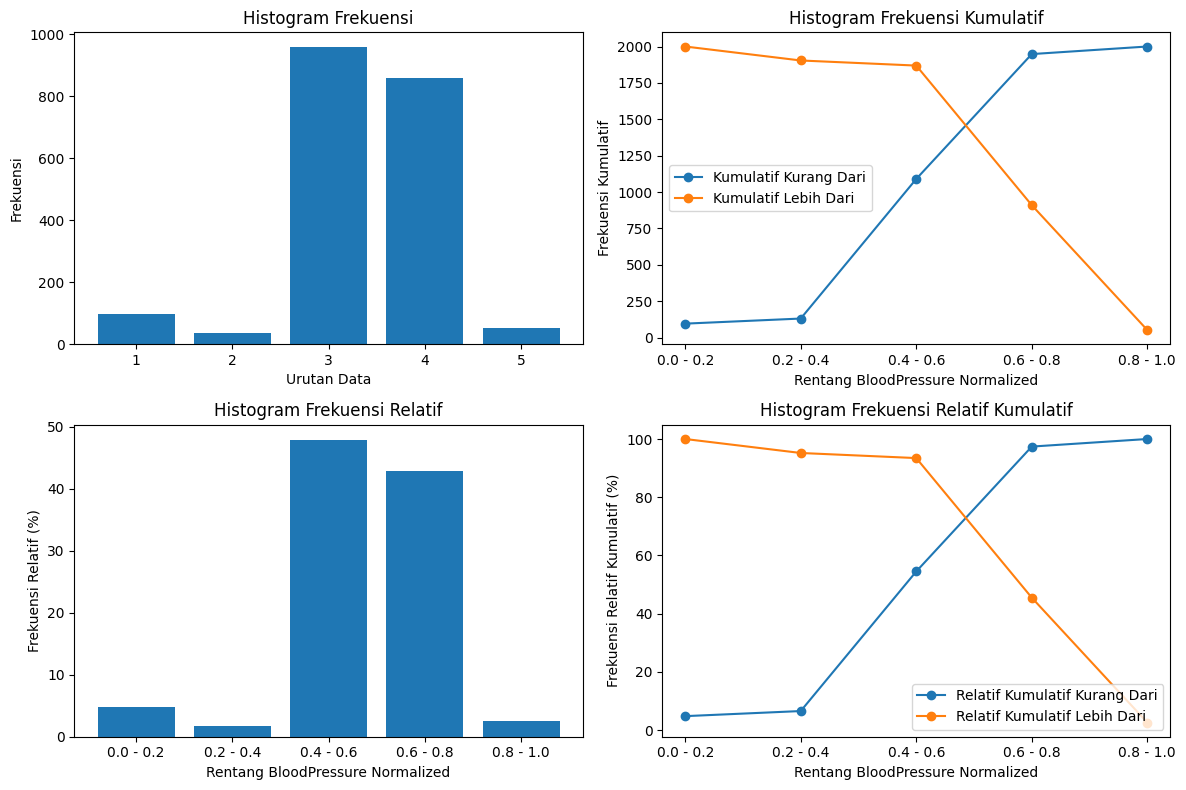

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Membaca data dari file Excel
Data = pd.read_excel(r'/content/gdrive/My Drive/excel/original data.xlsx',sheet_name='Program Pengolahan')

# Pilih kolom yang ingin Anda normalisasikan
nama_kolom = 'BloodPressure'

# Normalisasi data
nilai_maksimum = Data[nama_kolom].max()
nilai_minimum = Data[nama_kolom].min()
Data['BloodPressure_Normalized'] = (Data[nama_kolom] - nilai_minimum) / (nilai_maksimum - nilai_minimum)

# Tentukan jumlah bin (Anda dapat menyesuaikan ini berdasarkan preferensi Anda)
jumlah_bin = 5

# Hitung lebar bin
lebar_bin = 1 / jumlah_bin

# Buat bin
bin_edges = [i * lebar_bin for i in range(jumlah_bin + 1)]

# Buat label untuk bin berdasarkan rentang nilai normalisasi "BloodPressure"
bin_labels = [f'{round(bin_edges[i], 2)} - {round(bin_edges[i+1], 2)}' for i in range(jumlah_bin)]

# Berikan setiap nilai normalisasi ke dalam bin menggunakan pd.cut
Data['bin'] = pd.cut(Data['BloodPressure_Normalized'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Hitung distribusi frekuensi
frekuensi_tabel = Data['bin'].value_counts().sort_index().reset_index()
frekuensi_tabel.columns = ['Rentang BloodPressure_Normalized', 'Frekuensi']

# Hitung Frekuensi Kumulatif Kurang Dari dan Lebih Dari
frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] = frekuensi_tabel['Frekuensi'].cumsum()
frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'] = frekuensi_tabel['Frekuensi'][::-1].cumsum()[::-1]

# Hitung Frekuensi Relatif dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif'] = (frekuensi_tabel['Frekuensi'] / len(Data)) * 100

# Hitung Frekuensi Relatif Kumulatif Kurang Dari dan Lebih Dari dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif Kumulatif Kurang Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] / len(Data)) * 100
frekuensi_tabel['Frekuensi Relatif Kumulatif Lebih Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'][::-1] / len(Data)) * 100

# Tampilkan tabel distribusi frekuensi dari data normalisasi
print("\nTabel Distribusi Frekuensi (dalam persen):")
print(tabulate(frekuensi_tabel, headers='keys', tablefmt='pretty'))

# Plot grafik histogram dari data normalisasi
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
x_values = range(1, jumlah_bin + 1)  # Menyiapkan urutan data 1, 2, 3, 4, 5
plt.bar(x_values, frekuensi_tabel['Frekuensi'])  # Menggunakan urutan data sebagai x
plt.xlabel('Urutan Data')
plt.ylabel('Frekuensi')
plt.title('Histogram Frekuensi')

plt.subplot(2, 2, 2)
plt.plot(frekuensi_tabel['Rentang BloodPressure_Normalized'], frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'], label='Kumulatif Kurang Dari', marker='o')
plt.plot(frekuensi_tabel['Rentang BloodPressure_Normalized'], frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'], label='Kumulatif Lebih Dari', marker='o')
plt.xlabel('Rentang BloodPressure Normalized')
plt.ylabel('Frekuensi Kumulatif')
plt.title('Histogram Frekuensi Kumulatif')
plt.legend()

plt.subplot(2, 2, 3)
plt.bar(frekuensi_tabel['Rentang BloodPressure_Normalized'], frekuensi_tabel['Frekuensi Relatif'])
plt.xlabel('Rentang BloodPressure Normalized')
plt.ylabel('Frekuensi Relatif (%)')
plt.title('Histogram Frekuensi Relatif')

plt.subplot(2, 2, 4)
plt.plot(frekuensi_tabel['Rentang BloodPressure_Normalized'], frekuensi_tabel['Frekuensi Relatif Kumulatif Kurang Dari'], label='Relatif Kumulatif Kurang Dari', marker='o')
plt.plot(frekuensi_tabel['Rentang BloodPressure_Normalized'], frekuensi_tabel['Frekuensi Relatif Kumulatif Lebih Dari'], label='Relatif Kumulatif Lebih Dari', marker='o')
plt.xlabel('Rentang BloodPressure Normalized')
plt.ylabel('Frekuensi Relatif Kumulatif (%)')
plt.title('Histogram Frekuensi Relatif Kumulatif')
plt.legend()

plt.tight_layout()
plt.show()

#BMI

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

Data = pd.read_excel(r'/content/gdrive/My Drive/excel/original data.xlsx',sheet_name='Program Pengolahan')

In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Membaca data dari file Excel
Data = pd.read_excel(r'/content/gdrive/My Drive/excel/original data.xlsx',sheet_name='Program Pengolahan')

# Pilih kolom yang ingin Anda normalisasikan
nama_kolom = 'BMI'

# Normalisasi data
nilai_maksimum = Data[nama_kolom].max()
nilai_minimum = Data[nama_kolom].min()
Data['BMI_Normalized'] = (Data[nama_kolom] - nilai_minimum) / (nilai_maksimum - nilai_minimum)

# Tentukan jumlah bin (Anda dapat menyesuaikan ini berdasarkan preferensi Anda)
jumlah_bin = 5

# Hitung lebar bin
lebar_bin = 1 / jumlah_bin

# Buat bin
bin_edges = [i * lebar_bin for i in range(jumlah_bin + 1)]

# Buat label untuk bin berdasarkan rentang nilai normalisasi "BMI"
bin_labels = [f'{round(bin_edges[i], 2)} - {round(bin_edges[i+1], 2)}' for i in range(jumlah_bin)]

# Berikan setiap nilai normalisasi ke dalam bin menggunakan pd.cut
Data['bin'] = pd.cut(Data['BMI_Normalized'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Hitung distribusi frekuensi
frekuensi_tabel = Data['bin'].value_counts().sort_index().reset_index()
frekuensi_tabel.columns = ['Rentang BMI_Normalized', 'Frekuensi']

# Hitung Frekuensi Kumulatif Kurang Dari dan Lebih Dari
frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] = frekuensi_tabel['Frekuensi'].cumsum()
frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'] = frekuensi_tabel['Frekuensi'][::-1].cumsum()[::-1]

# Hitung Frekuensi Relatif dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif'] = (frekuensi_tabel['Frekuensi'] / len(Data)) * 100

# Hitung Frekuensi Relatif Kumulatif Kurang Dari dan Lebih Dari dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif Kumulatif Kurang Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] / len(Data)) * 100
frekuensi_tabel['Frekuensi Relatif Kumulatif Lebih Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'][::-1] / len(Data)) * 100

# Tampilkan tabel distribusi frekuensi dari data normalisasi
print("\nTabel Distribusi Frekuensi (dalam persen):")
print(tabulate(frekuensi_tabel, headers='keys', tablefmt='pretty'))


Tabel Distribusi Frekuensi (dalam persen):
+---+------------------------+-----------+---------------------------------+--------------------------------+--------------------+-----------------------------------------+----------------------------------------+
|   | Rentang BMI_Normalized | Frekuensi | Frekuensi Kumulatif Kurang Dari | Frekuensi Kumulatif Lebih Dari | Frekuensi Relatif  | Frekuensi Relatif Kumulatif Kurang Dari | Frekuensi Relatif Kumulatif Lebih Dari |
+---+------------------------+-----------+---------------------------------+--------------------------------+--------------------+-----------------------------------------+----------------------------------------+
| 0 |       0.0 - 0.2        |    27     |               27                |              2000              |        1.35        |                  1.35                   |                 100.0                  |
| 1 |       0.2 - 0.4        |    450    |               477               |              1973      


Tabel Distribusi Frekuensi (dalam persen):
+---+------------------------+-----------+---------------------------------+--------------------------------+--------------------+-----------------------------------------+----------------------------------------+
|   | Rentang BMI_Normalized | Frekuensi | Frekuensi Kumulatif Kurang Dari | Frekuensi Kumulatif Lebih Dari | Frekuensi Relatif  | Frekuensi Relatif Kumulatif Kurang Dari | Frekuensi Relatif Kumulatif Lebih Dari |
+---+------------------------+-----------+---------------------------------+--------------------------------+--------------------+-----------------------------------------+----------------------------------------+
| 0 |       0.0 - 0.2        |    27     |               27                |              2000              |        1.35        |                  1.35                   |                 100.0                  |
| 1 |       0.2 - 0.4        |    450    |               477               |              1973      

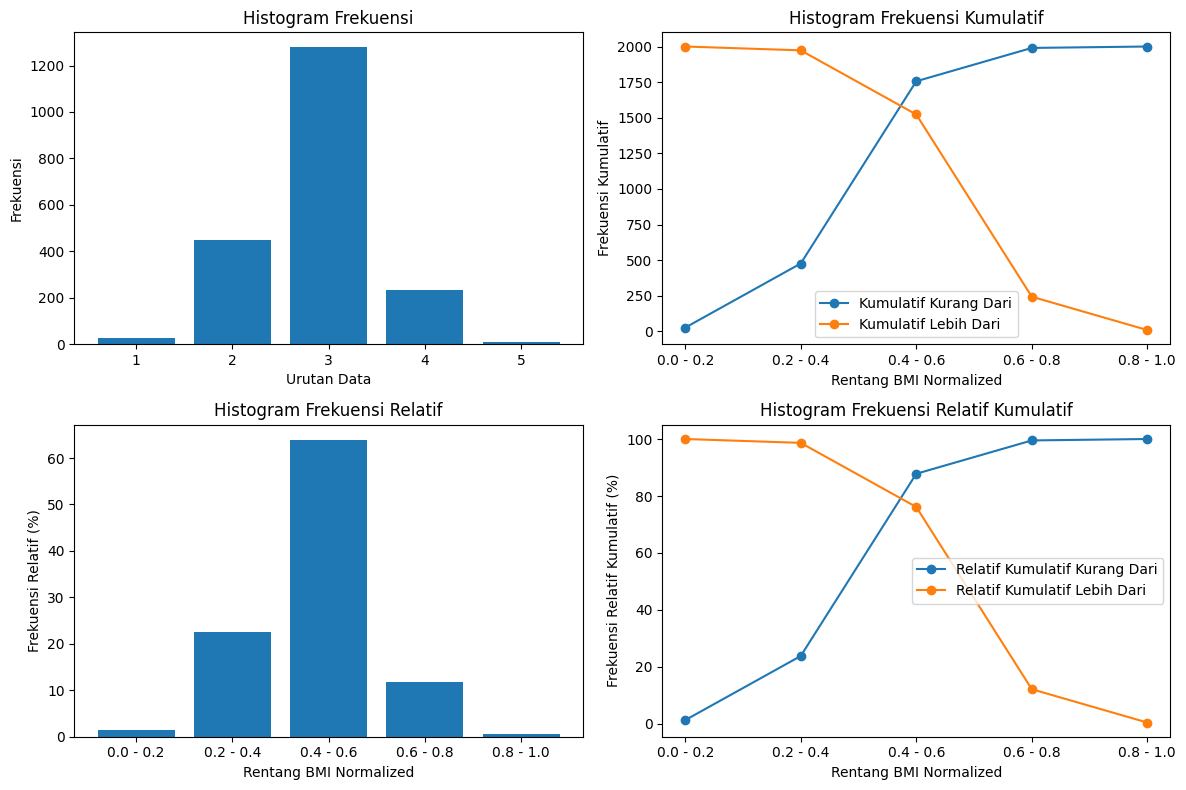

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Membaca data dari file Excel
Data = pd.read_excel(r'/content/gdrive/My Drive/excel/original data.xlsx',sheet_name='Program Pengolahan')

# Pilih kolom yang ingin Anda normalisasikan
nama_kolom = 'BMI'

# Normalisasi data
nilai_maksimum = Data[nama_kolom].max()
nilai_minimum = Data[nama_kolom].min()
Data['BMI_Normalized'] = (Data[nama_kolom] - nilai_minimum) / (nilai_maksimum - nilai_minimum)

# Tentukan jumlah bin (Anda dapat menyesuaikan ini berdasarkan preferensi Anda)
jumlah_bin = 5

# Hitung lebar bin
lebar_bin = 1 / jumlah_bin

# Buat bin
bin_edges = [i * lebar_bin for i in range(jumlah_bin + 1)]

# Buat label untuk bin berdasarkan rentang nilai normalisasi "BMI"
bin_labels = [f'{round(bin_edges[i], 2)} - {round(bin_edges[i+1], 2)}' for i in range(jumlah_bin)]

# Berikan setiap nilai normalisasi ke dalam bin menggunakan pd.cut
Data['bin'] = pd.cut(Data['BMI_Normalized'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Hitung distribusi frekuensi
frekuensi_tabel = Data['bin'].value_counts().sort_index().reset_index()
frekuensi_tabel.columns = ['Rentang BMI_Normalized', 'Frekuensi']

# Hitung Frekuensi Kumulatif Kurang Dari dan Lebih Dari
frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] = frekuensi_tabel['Frekuensi'].cumsum()
frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'] = frekuensi_tabel['Frekuensi'][::-1].cumsum()[::-1]

# Hitung Frekuensi Relatif dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif'] = (frekuensi_tabel['Frekuensi'] / len(Data)) * 100

# Hitung Frekuensi Relatif Kumulatif Kurang Dari dan Lebih Dari dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif Kumulatif Kurang Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] / len(Data)) * 100
frekuensi_tabel['Frekuensi Relatif Kumulatif Lebih Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'][::-1] / len(Data)) * 100

# Tampilkan tabel distribusi frekuensi dari data normalisasi
print("\nTabel Distribusi Frekuensi (dalam persen):")
print(tabulate(frekuensi_tabel, headers='keys', tablefmt='pretty'))

# Plot grafik histogram dari data normalisasi
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
x_values = range(1, jumlah_bin + 1)  # Menyiapkan urutan data 1, 2, 3, 4, 5
plt.bar(x_values, frekuensi_tabel['Frekuensi'])  # Menggunakan urutan data sebagai x
plt.xlabel('Urutan Data')
plt.ylabel('Frekuensi')
plt.title('Histogram Frekuensi')

plt.subplot(2, 2, 2)
plt.plot(frekuensi_tabel['Rentang BMI_Normalized'], frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'], label='Kumulatif Kurang Dari', marker='o')
plt.plot(frekuensi_tabel['Rentang BMI_Normalized'], frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'], label='Kumulatif Lebih Dari', marker='o')
plt.xlabel('Rentang BMI Normalized')
plt.ylabel('Frekuensi Kumulatif')
plt.title('Histogram Frekuensi Kumulatif')
plt.legend()

plt.subplot(2, 2, 3)
plt.bar(frekuensi_tabel['Rentang BMI_Normalized'], frekuensi_tabel['Frekuensi Relatif'])
plt.xlabel('Rentang BMI Normalized')
plt.ylabel('Frekuensi Relatif (%)')
plt.title('Histogram Frekuensi Relatif')

plt.subplot(2, 2, 4)
plt.plot(frekuensi_tabel['Rentang BMI_Normalized'], frekuensi_tabel['Frekuensi Relatif Kumulatif Kurang Dari'], label='Relatif Kumulatif Kurang Dari', marker='o')
plt.plot(frekuensi_tabel['Rentang BMI_Normalized'], frekuensi_tabel['Frekuensi Relatif Kumulatif Lebih Dari'], label='Relatif Kumulatif Lebih Dari', marker='o')
plt.xlabel('Rentang BMI Normalized')
plt.ylabel('Frekuensi Relatif Kumulatif (%)')
plt.title('Histogram Frekuensi Relatif Kumulatif')
plt.legend()

plt.tight_layout()
plt.show()

#Age

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

Data = pd.read_excel(r'/content/gdrive/My Drive/excel/original data.xlsx',sheet_name='Program Pengolahan')

In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Membaca data dari file Excel
Data = pd.read_excel(r'/content/gdrive/My Drive/excel/original data.xlsx',sheet_name='Program Pengolahan')

# Pilih kolom yang ingin Anda normalisasikan
nama_kolom = 'Age'

# Normalisasi data
nilai_maksimum = Data[nama_kolom].max()
nilai_minimum = Data[nama_kolom].min()
Data['Age_Normalized'] = (Data[nama_kolom] - nilai_minimum) / (nilai_maksimum - nilai_minimum)

# Tentukan jumlah bin (Anda dapat menyesuaikan ini berdasarkan preferensi Anda)
jumlah_bin = 5

# Hitung lebar bin
lebar_bin = 1 / jumlah_bin

# Buat bin
bin_edges = [i * lebar_bin for i in range(jumlah_bin + 1)]

# Buat label untuk bin berdasarkan rentang nilai normalisasi "Age"
bin_labels = [f'{round(bin_edges[i], 2)} - {round(bin_edges[i+1], 2)}' for i in range(jumlah_bin)]

# Berikan setiap nilai normalisasi ke dalam bin menggunakan pd.cut
Data['bin'] = pd.cut(Data['Age_Normalized'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Hitung distribusi frekuensi
frekuensi_tabel = Data['bin'].value_counts().sort_index().reset_index()
frekuensi_tabel.columns = ['Rentang Age_Normalized', 'Frekuensi']

# Hitung Frekuensi Kumulatif Kurang Dari dan Lebih Dari
frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] = frekuensi_tabel['Frekuensi'].cumsum()
frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'] = frekuensi_tabel['Frekuensi'][::-1].cumsum()[::-1]

# Hitung Frekuensi Relatif dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif'] = (frekuensi_tabel['Frekuensi'] / len(Data)) * 100

# Hitung Frekuensi Relatif Kumulatif Kurang Dari dan Lebih Dari dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif Kumulatif Kurang Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] / len(Data)) * 100
frekuensi_tabel['Frekuensi Relatif Kumulatif Lebih Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'][::-1] / len(Data)) * 100

# Tampilkan tabel distribusi frekuensi dari data normalisasi
print("\nTabel Distribusi Frekuensi (dalam persen):")
print(tabulate(frekuensi_tabel, headers='keys', tablefmt='pretty'))


Tabel Distribusi Frekuensi (dalam persen):
+---+------------------------+-----------+---------------------------------+--------------------------------+---------------------+-----------------------------------------+----------------------------------------+
|   | Rentang Age_Normalized | Frekuensi | Frekuensi Kumulatif Kurang Dari | Frekuensi Kumulatif Lebih Dari |  Frekuensi Relatif  | Frekuensi Relatif Kumulatif Kurang Dari | Frekuensi Relatif Kumulatif Lebih Dari |
+---+------------------------+-----------+---------------------------------+--------------------------------+---------------------+-----------------------------------------+----------------------------------------+
| 0 |       0.0 - 0.2        |   1229    |              1229               |              2000              |        61.45        |                  61.45                  |                 100.0                  |
| 1 |       0.2 - 0.4        |    462    |              1691               |              771   


Tabel Distribusi Frekuensi (dalam persen):
+---+------------------------+-----------+---------------------------------+--------------------------------+---------------------+-----------------------------------------+----------------------------------------+
|   | Rentang Age_Normalized | Frekuensi | Frekuensi Kumulatif Kurang Dari | Frekuensi Kumulatif Lebih Dari |  Frekuensi Relatif  | Frekuensi Relatif Kumulatif Kurang Dari | Frekuensi Relatif Kumulatif Lebih Dari |
+---+------------------------+-----------+---------------------------------+--------------------------------+---------------------+-----------------------------------------+----------------------------------------+
| 0 |       0.0 - 0.2        |   1229    |              1229               |              2000              |        61.45        |                  61.45                  |                 100.0                  |
| 1 |       0.2 - 0.4        |    462    |              1691               |              771   

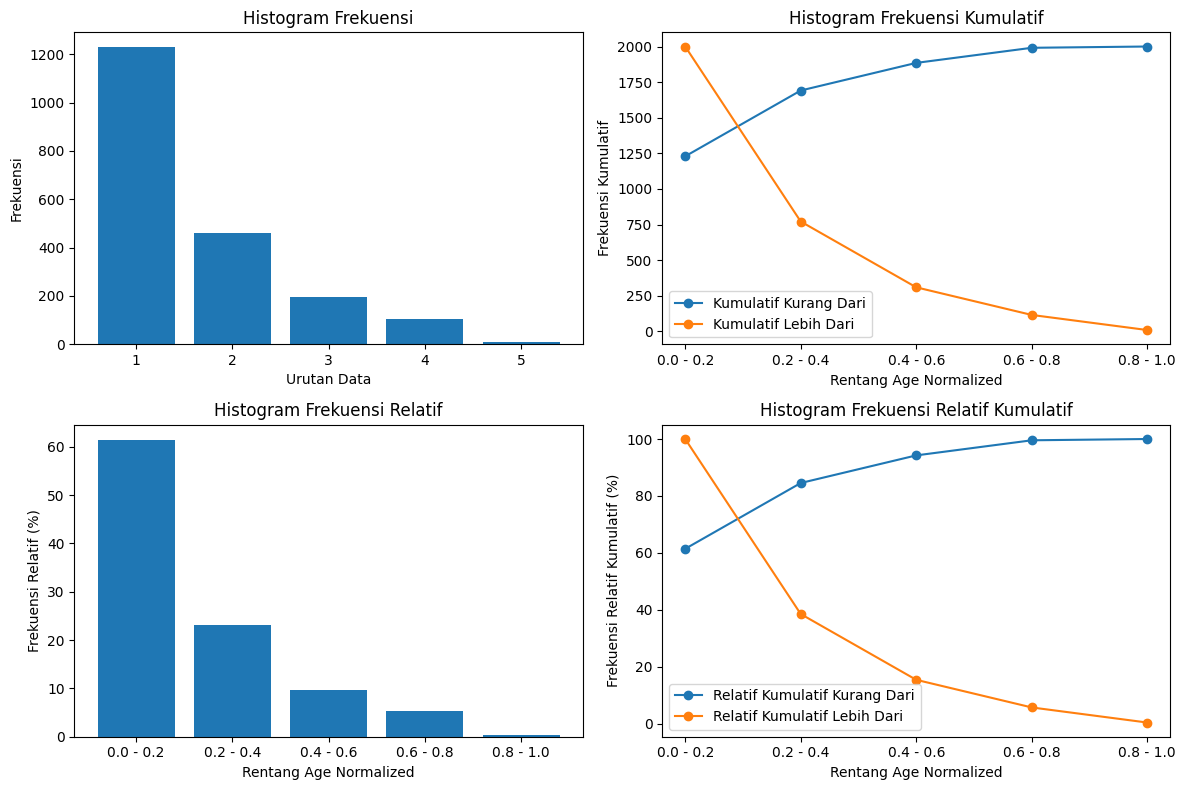

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Membaca data dari file Excel
Data = pd.read_excel(r'/content/gdrive/My Drive/excel/original data.xlsx',sheet_name='Program Pengolahan')

# Pilih kolom yang ingin Anda normalisasikan
nama_kolom = 'Age'

# Normalisasi data
nilai_maksimum = Data[nama_kolom].max()
nilai_minimum = Data[nama_kolom].min()
Data['Age_Normalized'] = (Data[nama_kolom] - nilai_minimum) / (nilai_maksimum - nilai_minimum)

# Tentukan jumlah bin (Anda dapat menyesuaikan ini berdasarkan preferensi Anda)
jumlah_bin = 5

# Hitung lebar bin
lebar_bin = 1 / jumlah_bin

# Buat bin
bin_edges = [i * lebar_bin for i in range(jumlah_bin + 1)]

# Buat label untuk bin berdasarkan rentang nilai normalisasi "Age"
bin_labels = [f'{round(bin_edges[i], 2)} - {round(bin_edges[i+1], 2)}' for i in range(jumlah_bin)]

# Berikan setiap nilai normalisasi ke dalam bin menggunakan pd.cut
Data['bin'] = pd.cut(Data['Age_Normalized'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Hitung distribusi frekuensi
frekuensi_tabel = Data['bin'].value_counts().sort_index().reset_index()
frekuensi_tabel.columns = ['Rentang Age_Normalized', 'Frekuensi']

# Hitung Frekuensi Kumulatif Kurang Dari dan Lebih Dari
frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] = frekuensi_tabel['Frekuensi'].cumsum()
frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'] = frekuensi_tabel['Frekuensi'][::-1].cumsum()[::-1]

# Hitung Frekuensi Relatif dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif'] = (frekuensi_tabel['Frekuensi'] / len(Data)) * 100

# Hitung Frekuensi Relatif Kumulatif Kurang Dari dan Lebih Dari dalam bentuk persen
frekuensi_tabel['Frekuensi Relatif Kumulatif Kurang Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'] / len(Data)) * 100
frekuensi_tabel['Frekuensi Relatif Kumulatif Lebih Dari'] = (frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'][::-1] / len(Data)) * 100

# Tampilkan tabel distribusi frekuensi dari data normalisasi
print("\nTabel Distribusi Frekuensi (dalam persen):")
print(tabulate(frekuensi_tabel, headers='keys', tablefmt='pretty'))

# Plot grafik histogram dari data normalisasi
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
x_values = range(1, jumlah_bin + 1)  # Menyiapkan urutan data 1, 2, 3, 4, 5
plt.bar(x_values, frekuensi_tabel['Frekuensi'])  # Menggunakan urutan data sebagai x
plt.xlabel('Urutan Data')
plt.ylabel('Frekuensi')
plt.title('Histogram Frekuensi')

plt.subplot(2, 2, 2)
plt.plot(frekuensi_tabel['Rentang Age_Normalized'], frekuensi_tabel['Frekuensi Kumulatif Kurang Dari'], label='Kumulatif Kurang Dari', marker='o')
plt.plot(frekuensi_tabel['Rentang Age_Normalized'], frekuensi_tabel['Frekuensi Kumulatif Lebih Dari'], label='Kumulatif Lebih Dari', marker='o')
plt.xlabel('Rentang Age Normalized')
plt.ylabel('Frekuensi Kumulatif')
plt.title('Histogram Frekuensi Kumulatif')
plt.legend()

plt.subplot(2, 2, 3)
plt.bar(frekuensi_tabel['Rentang Age_Normalized'], frekuensi_tabel['Frekuensi Relatif'])
plt.xlabel('Rentang Age Normalized')
plt.ylabel('Frekuensi Relatif (%)')
plt.title('Histogram Frekuensi Relatif')

plt.subplot(2, 2, 4)
plt.plot(frekuensi_tabel['Rentang Age_Normalized'], frekuensi_tabel['Frekuensi Relatif Kumulatif Kurang Dari'], label='Relatif Kumulatif Kurang Dari', marker='o')
plt.plot(frekuensi_tabel['Rentang Age_Normalized'], frekuensi_tabel['Frekuensi Relatif Kumulatif Lebih Dari'], label='Relatif Kumulatif Lebih Dari', marker='o')
plt.xlabel('Rentang Age Normalized')
plt.ylabel('Frekuensi Relatif Kumulatif (%)')
plt.title('Histogram Frekuensi Relatif Kumulatif')
plt.legend()

plt.tight_layout()
plt.show()